In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
%matplotlib inline

# Load training data saved locally
path = 'data/'
filename = 'named_train.csv'
df = pd.read_csv(path+filename)
df

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# How many unique classes (labeled outputs)?
np.unique(df['Target'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

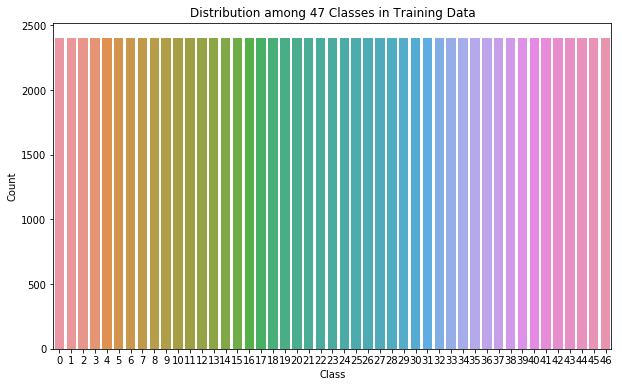

In [3]:
# Histogram of labeled output in training data showing equal distribution among 47 labels (classes)
plt.rcParams['figure.figsize'] = (10,6)
ax = sns.countplot(x='Target',data=df)
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Distribution among 47 Classes in Training Data');

#plt.hist(df['Target'],bins=1)
#plt.title('Distribution of Labeled Output in Training Data')
#plt.xlabel('Class')
#plt.ylabel('Frequency');

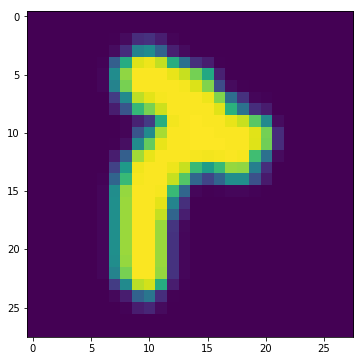

In [4]:
# What does the first, 28x28 pixel image sample look like?
firstrow = df.iloc[0,1:].values
firstrow = firstrow.reshape(28,28).astype('uint8')
plt.imshow(firstrow);

In [5]:
# Delineate labeled output and sample pixels in training data
X_train = df.iloc[:,1:]
y_train = df.iloc[:,0]

In [6]:
# Build Random Forest model
rf=RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [7]:
# Calculate mean accuracy on training set
rf.score(X_train,y_train)

1.0

In [8]:
# Calculate out of bag score, which gives good approximation of model accuracy to unseen data (test set) later
rf.oob_score_

0.8006382978723404

In [9]:
# Load test data saved locally
filename2 = 'named_test.csv'
df2 = pd.read_csv(path+filename2)
df2

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


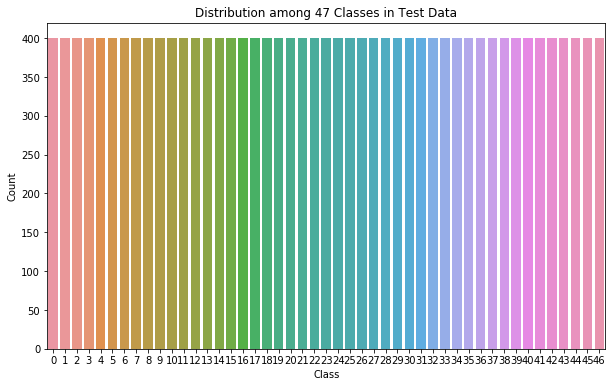

In [10]:
# Histogram of labeled output in test data showing equal distribution among 47 labels (classes)
plt.rcParams['figure.figsize'] = (10,6)
ax = sns.countplot(x='Target',data=df2)
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Distribution among 47 Classes in Test Data');

#plt.hist(df2['Target'],bins=1)
#plt.title('Distribution of Labeled Output in Test Data')
#plt.xlabel('Class')
#plt.ylabel('Frequency');

In [11]:
# Delineate labeled output and sample pixels in test data
X_test = df2.iloc[:,1:]
y_test = df2.iloc[:,0]

In [12]:
# Predictions using Random Forest model with inputted test set pixels (X_test). The predicted class is the one with
# with highest mean probability estimate across all trees.
pred = rf.predict(X_test)
pred

array([41, 39,  9, ...,  1, 26, 33])

In [13]:
# "For loop" to compare actual labeled output with those predicted by Random Forest model
actual=y_test.values
count=0
for i in range(len(pred)):
    if pred[i]==actual[i]:
        count=count+1

In [14]:
# How many classifications from the test set did the Random Forest get correct?
count

15288

In [15]:
# Total number of samples in test set
len(pred)

18800

In [16]:
# Calculate accuracy of Random Forest model (comparing prediction using test set pixels vs. actual test label)
acc = count/len(pred) * 100
print(acc)

81.31914893617022


In [17]:
# Alternate way to calculate (mean) accuracy using score Method 
rf.score(X_test, y_test)

0.8131914893617022

In [18]:
# Calculate accuracy (to confirm), precision and recall using metrics package
print(f"Accuracy:\n{round(metrics.accuracy_score(y_test,pred),4)}")
print(f"Precision:\n{metrics.precision_score(y_test,pred,average=None)}")
print(f"Recall:\n{metrics.recall_score(y_test,pred,average=None)}")

Accuracy:
0.8132
Precision:
[0.61572052 0.54411765 0.8746594  0.92059553 0.8525     0.87572254
 0.86714976 0.92839506 0.79197995 0.62162162 0.82915718 0.81220657
 0.88395062 0.84556962 0.90206186 0.68059701 0.85128205 0.90364583
 0.63753213 0.84275184 0.86881188 0.54545455 0.8902439  0.86987952
 0.65809769 0.84897025 0.82338902 0.86197917 0.78708134 0.8989899
 0.87223587 0.8817734  0.95781638 0.9182058  0.85519126 0.82014388
 0.7686747  0.86861314 0.86744186 0.87980769 0.61594203 0.73790323
 0.86453202 0.90837696 0.60841424 0.86792453 0.80701754]
Recall:
[0.705  0.6475 0.8025 0.9275 0.8525 0.7575 0.8975 0.94   0.79   0.805
 0.91   0.865  0.895  0.835  0.875  0.57   0.83   0.8675 0.62   0.8575
 0.8775 0.48   0.9125 0.9025 0.64   0.9275 0.8625 0.8275 0.8225 0.89
 0.8875 0.895  0.965  0.87   0.7825 0.855  0.7975 0.8925 0.9325 0.915
 0.6375 0.4575 0.8775 0.8675 0.47   0.92   0.805 ]


In [19]:
# Classification report 
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.62      0.70      0.66       400
           1       0.54      0.65      0.59       400
           2       0.87      0.80      0.84       400
           3       0.92      0.93      0.92       400
           4       0.85      0.85      0.85       400
           5       0.88      0.76      0.81       400
           6       0.87      0.90      0.88       400
           7       0.93      0.94      0.93       400
           8       0.79      0.79      0.79       400
           9       0.62      0.81      0.70       400
          10       0.83      0.91      0.87       400
          11       0.81      0.86      0.84       400
          12       0.88      0.90      0.89       400
          13       0.85      0.83      0.84       400
          14       0.90      0.88      0.89       400
          15       0.68      0.57      0.62       400
          16       0.85      0.83      0.84       400
          17       0.90    

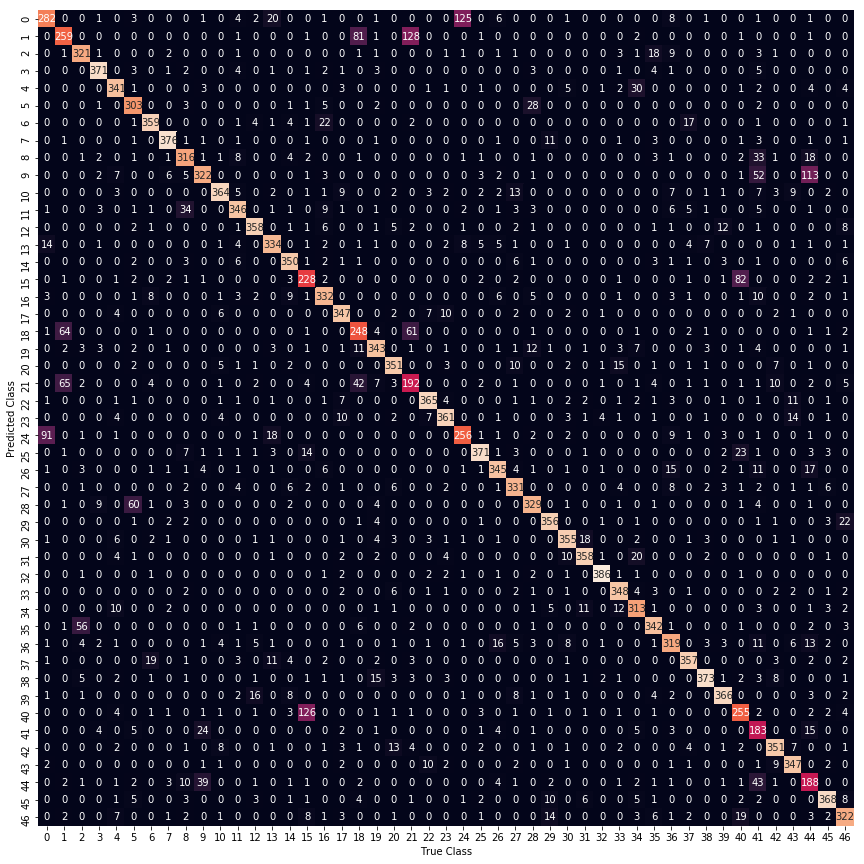

In [20]:
# Heatmapped Confusion Matrix
plt.rcParams['figure.figsize'] = (15,15)
mat=confusion_matrix(y_test,pred)
sns.heatmap(mat.T,square=True,annot=True, fmt='d',cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

In [21]:
# Iterate through hyperparameters using 5-fold cross-validated grid search 
# We set n_jobs = -1 to use all processors
parameters = {'max_depth':[50],'n_estimators':[100], 'min_samples_leaf':[1,2,5,10]}
rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)
classifier = GridSearchCV(rf_classifier,parameters, cv=5)
classifier.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [50], 'n_estimators': [100], 'min_samples_leaf': [1, 2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
# Which parameters were found to be best?
classifier.best_estimator_.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [23]:
# Train Random Forest model using best hyperparameters from cross-validated grid search
bestclassifier = RandomForestClassifier(**classifier.best_estimator_.get_params())
bestclassifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [24]:
# Calculate mean accuracy on training set
bestclassifier.score(X_train,y_train)

1.0

In [25]:
# Calculate mean accuracy on test set
bestclassifier.score(X_test,y_test)

0.8131914893617022

In [26]:
# Although the Random Forest overfits to the training data, these combinations of hyperparameters do indeed
# result in the highest accuracy on the test set at ~81%.  In other words, I have found that tweaking the 
# hyperparameters lessens the fit on the training data, but also lowers accuracy on test data. n_estimators = 100,
# max_depth = 50, min_samples_leaf = 1 (all default values) seem to provide the highest accuracy on the test set in 
# a reasonable amount of time (accuracy can be increased by 1% if number of trees increased to 1000, but this takes 
# 10x as long).